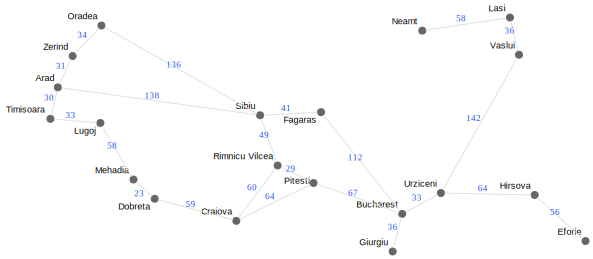

In [1]:
from graphviz import Graph,Digraph
from math import floor
from IPython.display import Image

romania_location_map = {
    'A' : {'pos': (21.31227,46.18656), 'connections': ['S','T','Z'] },
    'S' : {'pos': (24.12558,45.79833), 'connections': ['F','RV','O'] },
    'Z' : {'pos': (21.51742,46.62251), 'connections': ['O'] },
    'T' : {'pos': (21.20868,45.74887), 'connections': ['LU'] },
    'O' : {'pos': (21.91894,47.04650), 'connections': [] },
    'F' : {'pos': (24.97310,45.84164), 'connections': ['B'] },
    'LU' : {'pos': (21.90346,45.69099), 'connections': ['M'] },
    'RV' : {'pos': (24.36932,45.09968), 'connections': ['C','P'] },
    'M' : {'pos': (22.36452,44.90411), 'connections': ['D'] },
    'D' : {'pos': (22.65973,44.63692), 'connections': ['C'] },
    'C' : {'pos': (23.79488,44.33018), 'connections': [] },
    'P' : {'pos': (24.86918,44.85648), 'connections': ['B','C'] },
    'B' : {'pos': (26.10254,44.42677), 'connections': ['G','U'] },
    'G' : {'pos': (25.96993,43.90371), 'connections': [] },
    'U' : {'pos': (26.64112,44.71653), 'connections': ['H','V'] },
    'V' : {'pos': (27.72765,46.64069), 'connections': ['LA'] },
    'LA' : {'pos':(27.60144,47.15845), 'connections': ['N'] },
    'N' : {'pos': (26.38188,46.97587), 'connections': [] },
    'H' : {'pos': (27.94566,44.68935), 'connections': ['E'] },
    'E' : {'pos': (28.65273,44.04911), 'connections': [] }
}
romania_location_map_full = {
    'Arad' : {'pos': (21.31227,46.18656), 'connections': ['Sibiu','Timisoara','Zerind'] },
    'Sibiu' : {'pos': (24.12558,45.79833), 'connections': ['Fagaras','Rimnicu Vilcea','Oradea'] },
    'Zerind' : {'pos': (21.51742,46.62251), 'connections': ['Oradea'] },
    'Timisoara' : {'pos': (21.20868,45.74887), 'connections': ['Lugoj'] },
    'Oradea' : {'pos': (21.91894,47.04650), 'connections': [] },
    'Fagaras' : {'pos': (24.97310,45.84164), 'connections': ['Bucharest'] },
    'Lugoj' : {'pos': (21.90346,45.69099), 'connections': ['Mehadia'] },
    'Rimnicu Vilcea' : {'pos': (24.36932,45.09968), 'connections': ['Craiova','Pitesti'] },
    'Mehadia' : {'pos': (22.36452,44.90411), 'connections': ['Dobreta'] },
    'Dobreta' : {'pos': (22.65973,44.63692), 'connections': ['Craiova'] },
    'Craiova' : {'pos': (23.79488,44.33018), 'connections': [] },
    'Pitesti' : {'pos': (24.86918,44.85648), 'connections': ['Bucharest','Craiova'] },
    'Bucharest' : {'pos': (26.10254,44.42677), 'connections': ['Giurgiu','Urziceni'] },
    'Giurgiu' : {'pos': (25.96993,43.90371), 'connections': [] },
    'Urziceni' : {'pos': (26.64112,44.71653), 'connections': ['Hirsova','Vaslui'] },
    'Vaslui' : {'pos': (27.72765,46.64069), 'connections': ['Lasi'] },
    'Lasi' : {'pos':(27.60144,47.15845), 'connections': ['Neamt'] },
    'Neamt' : {'pos': (26.38188,46.97587), 'connections': [] },
    'Hirsova' : {'pos': (27.94566,44.68935), 'connections': ['Eforie'] },
    'Eforie' : {'pos': (28.65273,44.04911), 'connections': [] }
}

# calculating geodesic SLDs
import geopy.distance
def calculate_GD(M, start, end):

    (x0,y0) = M[start]['pos']
    (x1,y1) = M[end]['pos']
    return floor(geopy.distance.geodesic((y0,x0), (y1,x1)).miles)


# GRAPHVIZ MODULE
G = Graph(format='png', engine='neato')
G.attr(overlap='compress')
G.attr(sep='3')
G.attr('edge', fontsize='9', color='#e0e1e2', fontcolor='#1f4cef')
G.attr('node', shape='circle', width='0.1', height='0.1', style='filled', fontname="Arial", fontsize='9', fixedsize='true', color="#666666")

Map = romania_location_map_full
for node in Map.keys():
    (posX, posY) = Map[node]['pos']
    #node = node + '\n366'
    G.node(node, pos='{},{}!'.format(posX,posY), xlabel=node, label="")
for node in Map.keys():
    for con_node in Map[node]['connections']:
        G.edge(node, con_node, label=str(calculate_GD(Map, node, con_node)))

#print(G.source)
G

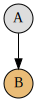

In [2]:
tree_dot = Digraph(format='png')
tree_dot.attr('node', shape='circle', width='0.4', style='filled', fixedsize='true', fillcolor='#dddddd')
tree_dot.node('B', fillcolor='#eabc77')
tree_dot.edge('A','B')


tree_dot

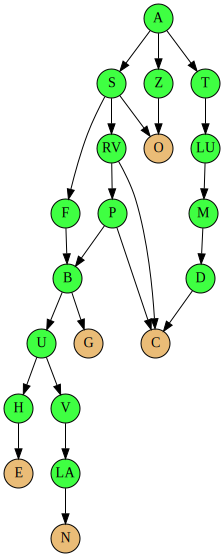

In [3]:
Map_short = romania_location_map
tree_dot = Digraph(format='png')
tree_dot.attr('node', shape='circle', width='0.4', style='filled', fixedsize='true', fillcolor='#dddddd')
for node in Map_short.keys():
    for con_node in Map_short[node]['connections']:
        tree_dot.node(node, fillcolor='#3fff42')
        tree_dot.node(con_node, fillcolor='#eabc77')
        tree_dot.edge(node, con_node)
        
tree_dot

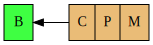

In [4]:
# Queue
data_dot = Digraph(format='png')
data_dot.attr('node', shape='record', width='0.4')
data_dot.attr(rankdir='RL')

data_dot.node('current', label='B', style='filled', fillcolor='#3fff42')
data_dot.edge('queue' + ':f'+ str(0), 'current')

data_label = '<f0> C |<f1> P |<f2> M'
data_dot.node('queue', label='{ '+ data_label +' }', style='filled', fillcolor='#eabc77')

data_dot

Constructing below lines are tricky when we want to use above snippet as a library..
```python
data_label = '<f0> C |<f1> P |<f2> M'
data_dot.node('queue', label='{ '+ data_label +' }', style='filled', fillcolor='#eabc77')
```

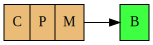

In [5]:
# Stack
data_dot = Digraph(format='png')
data_dot.attr('node', shape='record', width='0.4')
data_dot.attr(rankdir='LR')

data_dot.node('current', label='B', style='filled', fillcolor='#3fff42')
data_dot.edge('stack' + ':f'+ str(2), 'current')

data_label = '<f0> C |<f1> P |<f2> M'
data_dot.node('stack', label='{ '+ data_label +' }', style='filled', fillcolor='#eabc77')

data_dot

**How to display multiple images at one shot??** (no, not just by writing their variables as below, it works for just one varaible, not more)
```python
# below does not work to show multiple images in jupyter
tree_dot
data_dot
```
Instead below could be done. Note we have piped dot output instead of writing to a file. 

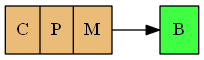

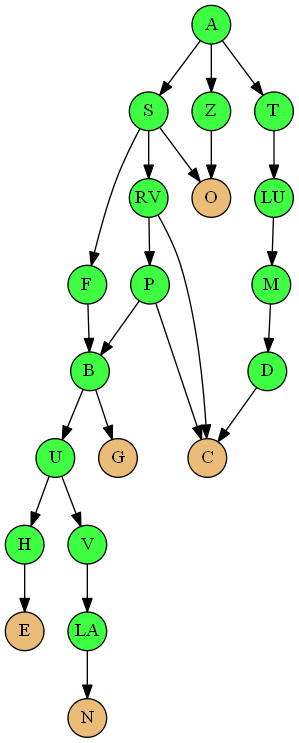

In [6]:
from IPython.display import display
from IPython.display import Image as IImage

display(IImage(data_dot.pipe()),IImage(tree_dot.pipe()))

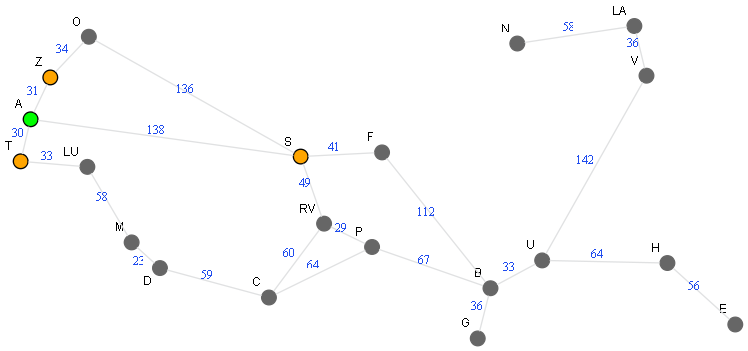

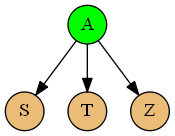

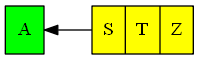

In [7]:
from docHelpers_ipython import Doc
from IPython.display import display, Image

doc = Doc()
d1,d2,d3 = doc.computeGraphs('A',['S','T','Z'])
display(Image(d1),Image(d2),Image(d3))

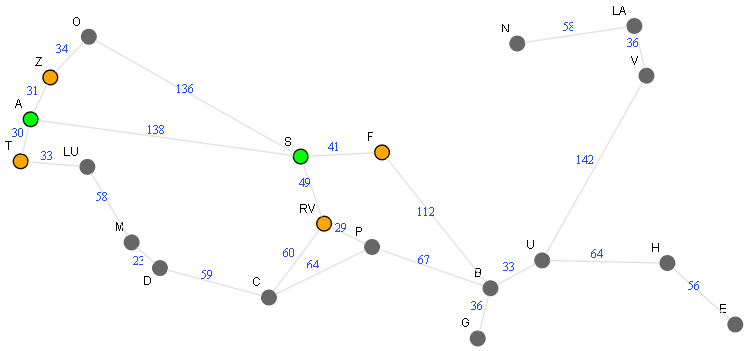

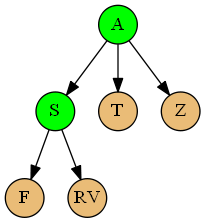

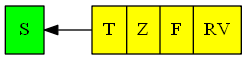

In [8]:
d1,d2,d3 = doc.computeGraphs('S',['F','RV'])
display(Image(d1),Image(d2),Image(d3))

In [9]:
!pip install Wand

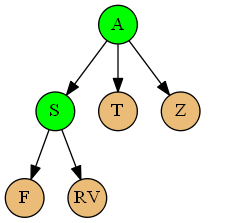

In [10]:
# https://stackoverflow.com/questions/39939780/how-do-i-create-an-animated-gif-in-python-using-wand
from wand.image import Image as Image2
from wand.color import Color
from wand.compat import nested

with nested(Image2(),
            Image2(blob=d2),
            Image2(blob=d3)) as (wand, one, two):
    width = max(one.width, two.width)
    height = max(one.height, two.height)
    # Rebuild images with full extent of frame
    with Image2(width=width, height=height, background=Color('WHITE')) as f1:
        f1.composite(one, 0, 0)
        wand.sequence.append(f1)
    with Image2(width=width, height=height, background=Color('WHITE')) as f2:
        f2.composite(two, 0, 0)
        wand.sequence.append(f2)
    # Create progressive delay for each frame
    for cursor in range(2):
        with wand.sequence[cursor] as frame:
            frame.delay = 100
    wand.type = 'optimize'
    wand.save(filename='animated.gif')
    
display(Image('animated.gif'))

Which version of python this notebook is running?

In [11]:
 #https://intelligea.wordpress.com/2015/08/05/check-if-python-version-is-64-or-32-bit/
import struct;print(struct.calcsize("P") * 8)

32


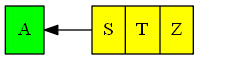

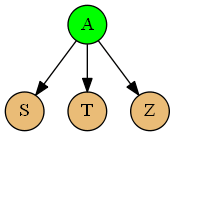

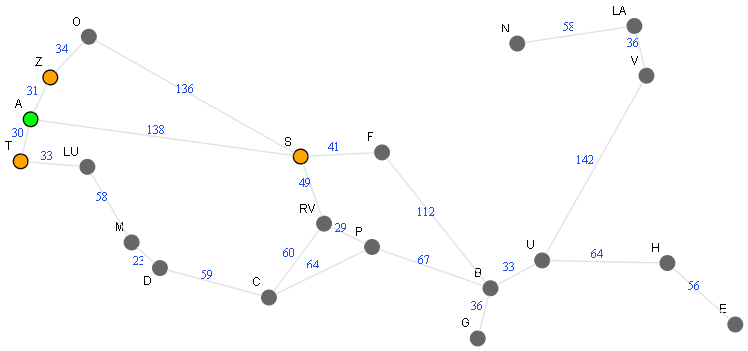

In [12]:
display(Image(doc.render()[0]),Image(doc.render()[1]),Image(doc.render()[2]))

Trying to display images as HTML with flexible layout..  

<br><hr>
<div style="display:flex;" >
  <div >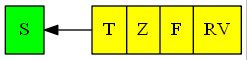</div>
  <div >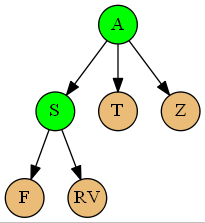</div>
  <div >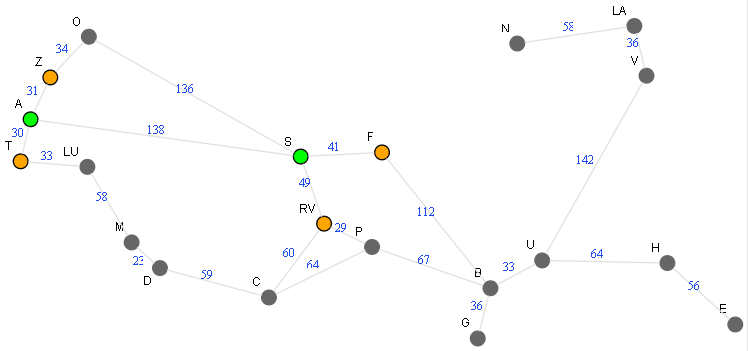</div>
</div>